<a href="https://colab.research.google.com/github/Hemantr05/generative-ai-workshop/blob/master/Generating_Images_with_Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating Images with Stable Diffusion

### Import packages

In [ ]:
from diffusers import DiffusionPipeline
import torch

### Initialize Stable Diffusion Base Model

In [ ]:
# load both base & refiner
base = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)

### Initialize Stable Diffusion Refiner Model

In [ ]:
base.to("cuda")
refiner = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    text_encoder_2=base.text_encoder_2,
    vae=base.vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)

### Hyperparameters

In [ ]:
refiner.to("cuda")

# Define how many steps and what % of steps to be run on each experts (80/20) here
n_steps = 40
high_noise_frac = 0.8

In [ ]:
prompt = "A majestic lion jumping from a big stone at night"

In [ ]:
# run both experts
image = base(
    prompt=prompt,
    num_inference_steps=n_steps,
    denoising_end=high_noise_frac,
    output_type="latent",
).images

In [ ]:
image = refiner(
    prompt=prompt,
    num_inference_steps=n_steps,
    denoising_start=high_noise_frac,
    image=image,
).images[0]

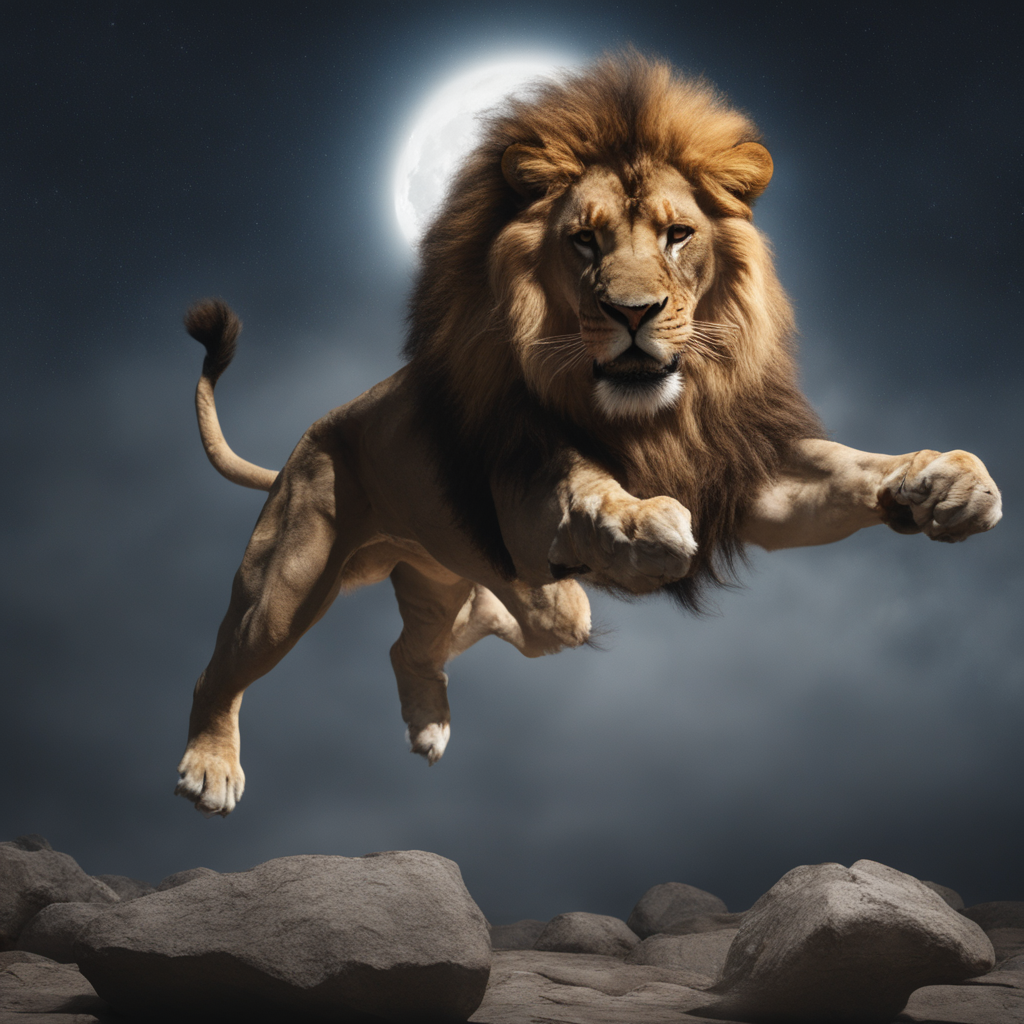

In [ ]:
image